<h1>Predictive Model for Student Admission Using Logistic Regression</h1>

With the provided data containg a student's two exam scores, we will construct a model that will be used to predict if a student will be admitted into a University.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

We will start by loading in the data set.

In [14]:
def load_data(file):
    '''
    Args:
        file (str): A file from which we will pull data from.
    
    Returns:
        X (ndarray Shape (100, 2)): 100 training examples attained from the first two elements of each row
        y (ndarray Shape (100,)):   100 target values attained from the last element of each row.
    '''
    data = np.loadtxt(file, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

X_train, y_train = load_data('/home/james/python/misc_projects/Data-Analytics-of-Mathematical-Concepts/student_admittion_classification/student_admission_data.txt')

Let's better understand the data by viewing the first few rows of each array, observe their dimensions, and lastly we will visualize our data.

In [15]:
print(f'X-train is of shape {X_train.shape}')
print(f'The first 10 training examples are:\n {np.round(X_train[:10], 2)}')
print(f'\ny-train is of shape {y_train.shape}')
print(f'The first 10 target values are:\n {y_train[:10].reshape(-1,1)}')


X-train is of shape (100, 2)
The first 10 training examples are:
 [[34.62 78.02]
 [30.29 43.89]
 [35.85 72.9 ]
 [60.18 86.31]
 [79.03 75.34]
 [45.08 56.32]
 [61.11 96.51]
 [75.02 46.55]
 [76.1  87.42]
 [84.43 43.53]]

y-train is of shape (100,)
The first 10 target values are:
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]


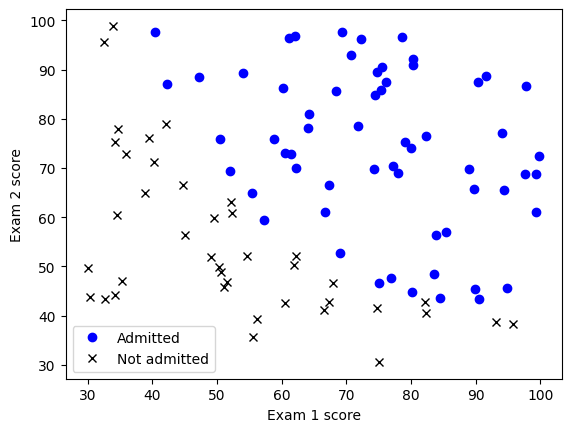

In [16]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    negative = (y == 0)
    positive = (y == 1)
    
    plt.plot(X[positive, 0], X[positive, 1], 'bo', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'kx', label=neg_label)




# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the x-axis label
plt.xlabel('Exam 1 score')
# Set the y-axis label
plt.ylabel('Exam 2 score')
plt.legend(loc="lower left")
plt.show()

Now we will build a logistic regression model to fit the data.

We will be using the sigmoid function:

$$ f_{\vec{w},b}(\vec{x}) = \frac{1}{1+e^{-\vec{w} \cdot \vec{x} - b}}

In [17]:
def sigmoid(z):
    '''
    Args:
        z (ndarray Shape (m,n)): The argument of the sigmoid function

    Returns:
        g (ndarray Shape (m,n)): The output of the sigmoid function
    '''

    g = 1 / (1 + np.exp(-z))

    return g

Now we will compute the cost function of our model.

The cost function for logistic regression is:


$$ J(\vec{w},b) = \frac{1}{m}\sum_{i=1}^{m} \left[ loss(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) \right]$$

where:

* m is the number of training examples in the dataset.

* $x^{(i)}$ is the features of the $i^{th}$ training example.

* $y^{(i)}$ is the target value for the $i^{th}$ training example.

*  $f_{\vec{w},b}(\vec{x}^{(i)})$ is the model's prediction.

* $loss(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)})$ is the cost for the $i^{th}$ training example, which is:

    $$loss(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) := -y^{(i)} \ln\left(f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \ln\left( 1 - f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right)$$



In [18]:
def compute_cost(X, y, w, b):
    """
    Computes the cost over all examples

    Args:
      X (ndarray Shape (m,n)):   data, m examples by n features
      y (ndarray Shape (m,)): target value 
      w (ndarray Shape(n,)): Values of parameters of the model
      b (int):                   scalar Values of model's bias parameter
      
    Returns:
      total_cost (scalar):       cost of the model
    """

    m, n = X.shape
    
    loss_sum = 0
    # Loop over each example for the summation
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            z_wb_ij = w[j] * X[i][j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        loss = -(y[i] * np.log(f_wb)) - ((1 - y[i]) * np.log(1 - f_wb))
        loss_sum += loss

    total_cost = loss_sum / m

    return total_cost

Next we will run gradient decent for logistic regression.

We will repeat until convergence:

$$ \forall j \in \text{\{1, 2 , ... , n\}}, $$

$$ b := b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b} \text{, and}$$
$$w_j := w_j -  \alpha \frac{\partial J(\vec{w},b)}{\partial w_j}$$

with simultanious updates to parameters $b$ and $w_j$, where:

* $\vec{w}$ are the parameters (weights) of the model.

* $b$ is the bias of the model.

* And finally:

$$\nabla J(\vec{w},b) = \hspace{10pt}<\frac{1}{m} \sum\limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \hspace{3pt}, \hspace{8pt}\frac{1}{m} \sum\limits_{i=1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})>$$

In [19]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b): 
    """
    Computes gradient decent

    Args:
      X (ndarray Shape (m,n)):     data, m examples by n features
      y (ndarray Shape (m,)):      target values
      w (ndarray Shape (n,)):      Values of parameters of the model
      b (int):                     scalar Values of bias parameter of the model
      
    Returns:
      dj_dw (ndarray Shape (m,1)): The partial of cost with respect to w
      dj_db (scalar):              The partial of cost with respect to b
    """
    m, n = X.shape
    # Initalize our return values
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += w[j] * X[i][j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i]) * X[i][j]
            dj_dw[j] += dj_dw_ij
            
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw

In [20]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to achieve our model's optimized weights and bias
    by updatying the values after each iteration.
    
    Args:
      X (array Shape (m, n):     data, m examples by n features
      y (array Shape (m,)):      target values
      w_in (array Shape (n,)):   Initial values of parameters of the model
      b_in (scalar):             Initial value of parameter of the model
      cost_function:             function to compute cost
      alpha (float):             Learning rate
      num_iters (int):           number of iterations to run gradient descent

    Returns:
      w (array_like Shape (n,)): Updated values of parameters of the model after
        gradient descent is performed

      b (scalar):                Updated value of parameter of the model after
        gradient descent is performed
    """
    
    # Number of training examples
    m = len(X)
    
    # Arrays to store cost J and w at each iteration
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate gradient decent and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        # Update Parameters using w, b, alpha, and the gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
       
        # Save cost J at each iteration while preserving resources
        if i < 100_000:
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print the cost at every 1000th iteration
        if (i % 1000 == 0):
            w_history.append(w_in)
            print(f"Iteration: {i:4}")
            print(f"Cost: {float(J_history[-1]):8.2f}")
            print(f"w:{w_history[-1]}")
            print("")
        
    return w_in, b_in, J_history, w_history

Let's observe the cost of the model as a funciton of the quantity of iterations.

In [21]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

alpha = 0.001
iterations = 10_000

w,b, J_history, w_history = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                    compute_cost, compute_gradient, alpha, iterations)

Iteration:    0
Cost:     0.96
w:[[0.04397755]
 [0.04655245]]

Iteration: 1000
Cost:     0.31
w:[[0.06992517]
 [0.0634808 ]]



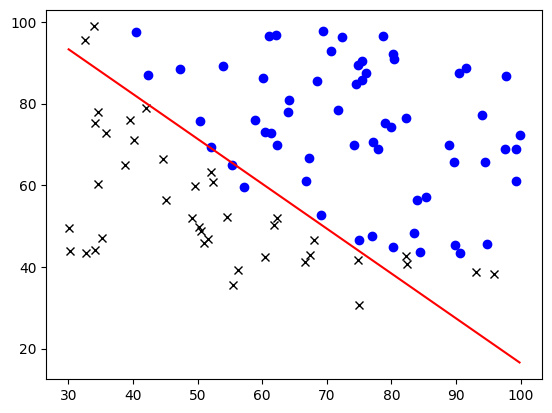

In [ ]:
def plot_decision_boundary(w, b, X, y):
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="r")

plot_decision_boundary(w, b, X_train, y_train)

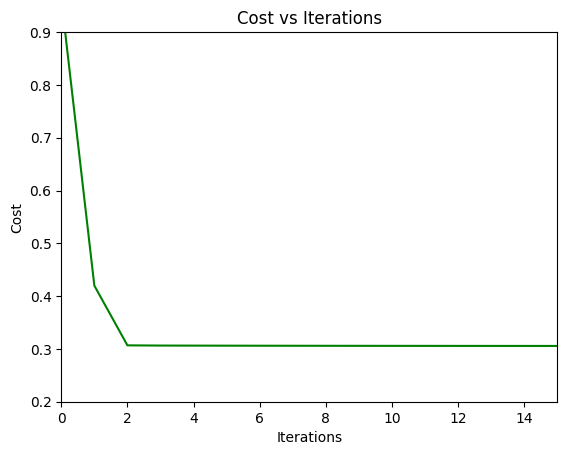

In [ ]:
iterations = [n for n in range(len(J_history))]

plt.plot(iterations, J_history, 'g')

plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.xlim(0, 15)
plt.ylim(0.2, 0.9)
plt.show()

In [ ]:
def predict(X, w, b, t): 
    """
    Predict whether the label is 0 or 1 (not admitted or admitted) for a given using the learned
    weights and bias
    
    Args:
    X (ndarray Shape (m, n)):  data, m examples by n features
    w (ndarray Shape (n,)):    learned Weights of the model
    b (scalar):                learned Bias of the model
    t (scalar):                threshold

    Returns:
    p (ndarray (m,1)):         The predictions for X using a threshold of t
    """

    m, n = X.shape  
    # Initialize the adimssion array
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += w[j] * X[i][j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the 0.5 threshold to determine adimssion status
        p[i] = (f_wb >= t)

    return p